1- Basic KNN Classification Example
- Uses sklearn library
- Generates synthetic/artificial data using a fixed random_state
- KNN with L2 (euclidean distance)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# 1️⃣ Generate synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.8, random_state=42)

# 2️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
# knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)

knn.fit(X_train, y_train)

# 4️⃣ Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 5️⃣ Display results
plot_decision_boundary(X_test, y_test, knn, "KNN Classification (Test Set)")

2- Basic KNN Classification Example
- Generates synthetic/artificial data using custom code
- KNN with L1, L2 and generic minkowski distance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# 🌸 Generate inner flower (Class 0)
def generate_flower(n_samples, radius=1.0, noise=0.1, petals=5):
    theta = np.linspace(0, 2 * np.pi, n_samples)
    r = radius + 0.3 * np.sin(petals * theta)  # petal shape
    x = r * np.cos(theta) + np.random.normal(0, noise, n_samples)
    y = r * np.sin(theta) + np.random.normal(0, noise, n_samples)
    return np.column_stack((x, y))

# 🌼 Generate outer flower (Class 1)
def generate_outer_flower(n_samples, radius=2.0, noise=0.1, petals=5):
    theta = np.linspace(0, 2 * np.pi, n_samples)
    r = radius + 0.3 * np.sin(petals * theta + np.pi / petals)  # phase shift
    x = r * np.cos(theta) + np.random.normal(0, noise, n_samples)
    y = r * np.sin(theta) + np.random.normal(0, noise, n_samples)
    return np.column_stack((x, y))

# 1️⃣ Generate synthetic dataset
n_samples = 1000
X0 = generate_flower(n_samples // 2, radius=1.0, noise=0.08)
X1 = generate_outer_flower(n_samples // 2, radius=1.5, noise=0.08)
X = np.vstack((X0, X1))
y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

# 2️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
# knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
# knn = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)

knn.fit(X_train, y_train)

# 4️⃣ Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 5️⃣ Display results
plot_decision_boundary(X_test, y_test, knn, "KNN Classification (Test Set)")



3- Heart Disease Detection Example
- Read dataset from file and apply feature scaling using different methods
- KNN with L1, L2 and generic minkowski distance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Load dataset
df = pd.read_csv('heart_disease.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 2️⃣ Feature scaling
# scaler = StandardScaler()
scaler = MinMaxScaler()
# scaler = MaxAbsScaler()

X_scaled = scaler.fit_transform(X)

# 3️⃣ K-Fold setup
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 4️⃣ Cross-validation loop
fold = 1
accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"\n📁 Fold {fold} Accuracy: {acc:.4f}")
    # print(classification_report(y_test, y_pred, digits=4))
    fold += 1

# 5️⃣ Summary
print(f"\n📊 Mean Accuracy over {k} folds: {np.mean(accuracies):.4f}")
print(f"📉 Standard Deviation: {np.std(accuracies):.4f}")

4- Regression for Synthetic Data using KNN
- Notice the effect of using too large a value for K
- Notice the effect of increasing noise in the data


📉 Mean Squared Error (MSE): 0.0570


c:\Users\mbilal\miniconda3\envs\tf-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\mbilal\miniconda3\envs\tf-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127754 missing from current font.
  font.set_text(s, 0, flags=flags)


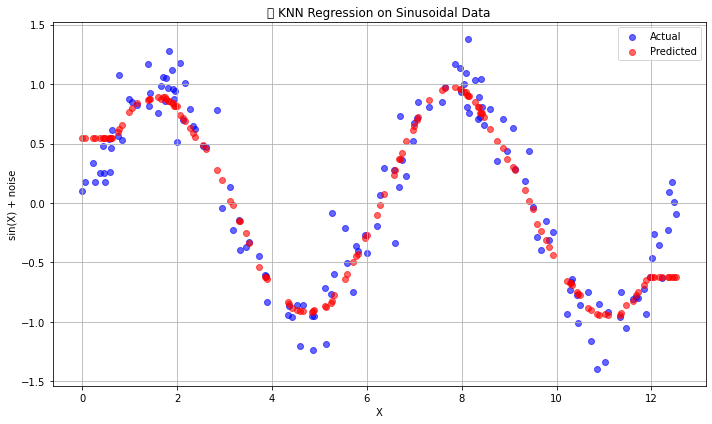

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1️⃣ Generate synthetic sinusoidal data
np.random.seed(42)
X = np.linspace(0, 4 * np.pi, 500).reshape(-1, 1)
y = np.sin(X).ravel() + 0.2 * np.random.normal(size=X.shape[0])  # add noise

# 2️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Apply KNN regression
knn = KNeighborsRegressor(n_neighbors=35)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 4️⃣ Report MSE
mse = mean_squared_error(y_test, y_pred)
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")

# 5️⃣ Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title("🌊 KNN Regression on Sinusoidal Data")
plt.xlabel("X")
plt.ylabel("sin(X) + noise")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5- Regression for House Price Estimation

📉 Mean Squared Error (MSE): 4473809052.4286


c:\Users\mbilal\miniconda3\envs\tf-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\mbilal\miniconda3\envs\tf-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0, flags=flags)


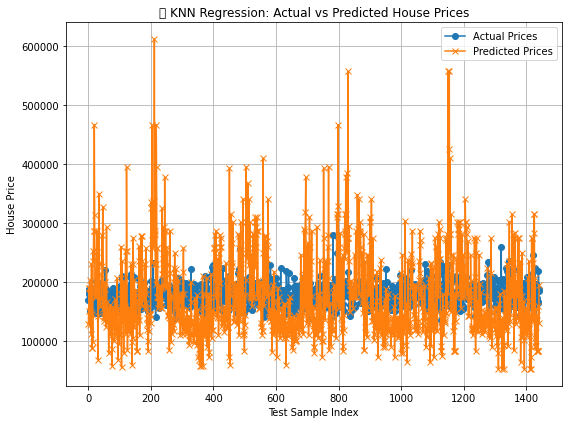

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1️⃣ Load training and test data
train_df = pd.read_csv('house_price_train_subset.csv')
test_df = pd.read_csv('house_price_test_subset.csv')

# 2️⃣ Clean data: replace infinities and drop NaNs
train_df = train_df.replace([np.inf, -np.inf], np.nan).dropna()
test_df = test_df.replace([np.inf, -np.inf], np.nan).dropna()

# 3️⃣ Separate features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# 4️⃣ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Train KNN regressor
knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# 6️⃣ Predict on test data
y_pred = knn.predict(X_test_scaled)

# 7️⃣ Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")

# 8️⃣ Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual Prices', marker='o')
plt.plot(y_pred, label='Predicted Prices', marker='x')
plt.title("🏠 KNN Regression: Actual vs Predicted House Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()